In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data_fos = pd.read_csv("fos_raw.csv")

In [3]:
data_fos

,article_id,fos
0,53e99784b7602d9701f3e133,Agronomy
1,53e99784b7602d9701f3e133,Moisture
2,53e99784b7602d9701f3e133,Hydrology
3,53e99784b7602d9701f3e133,Environmental science
4,53e99784b7602d9701f3e133,Dry weight
...,...,...
45625710,607544c6e4510cd7c837482c,Classical mechanics
45625711,607544c6e4510cd7c837482c,Nonlinear Schrödinger equation
45625712,607544c6e4510cd7c837482c,Particle
45625713,607544c6e4510cd7c837482c,Mathematics


In [4]:
data_fos.isna().sum()

article_id     0
fos           13
dtype: int64

In [5]:
data_fos.article_id.unique().shape

(4935889,)

In [18]:
data_fos.fos.unique().shape

(166002,)

In [6]:
article_nan = list(data_fos[data_fos.fos.isna()].article_id)

In [7]:
for article in article_nan:
    print(data_fos[data_fos.article_id == article])

                      article_id                  fos
756001  53e9991cb7602d97021585bd                  NaN
756002  53e9991cb7602d97021585bd       Floating point
756003  53e9991cb7602d97021585bd     Computer science
756004  53e9991cb7602d97021585bd           Arithmetic
756005  53e9991cb7602d97021585bd  IEEE floating point
                       article_id                           fos
1635851  53e99a92b7602d970230ad3f                           NaN
1635852  53e99a92b7602d970230ad3f                    Arithmetic
1635853  53e99a92b7602d970230ad3f  Theoretical computer science
1635854  53e99a92b7602d970230ad3f                     Minifloat
1635855  53e99a92b7602d970230ad3f                   Signed zero
1635856  53e99a92b7602d970230ad3f           Interval arithmetic
1635857  53e99a92b7602d970230ad3f                   Mathematics
                       article_id                                     fos
4918755  53e9a02db7602d9702914f00                                     NaN
4918756  53e9a02

In [9]:
data_fos.dropna(inplace=True)

In [12]:
fos_popularity = data_fos.groupby('fos').count()

In [13]:
fos_popularity

,article_id
fos,
#P-complete,96
#SAT,407
% abnormal forms,1
% area reduction,191
% diameter reduction,7
...,...
μClinux,9
σ-compact space,1
σ-finite measure,64


In [14]:
rare_fos = len(fos_popularity[fos_popularity.values == 1])
print(f'Number of fos with one article id: {rare_fos} ({round(rare_fos/data_fos.fos.unique().shape[0] * 100,2)}%)')

Number of fos with one article id: 30881 (18.6%)


(array([6.3457e+04, 4.0830e+04, 3.3474e+04, 1.7004e+04, 7.7160e+03,
        2.7730e+03, 6.3100e+02, 1.0000e+02, 1.4000e+01, 3.0000e+00]),
 array([ 0.       ,  1.4963746,  2.9927492,  4.4891238,  5.9854984,
         7.481873 ,  8.9782476, 10.4746222, 11.9709968, 13.4673714,
        14.963746 ]),
 <BarContainer object of 10 artists>)

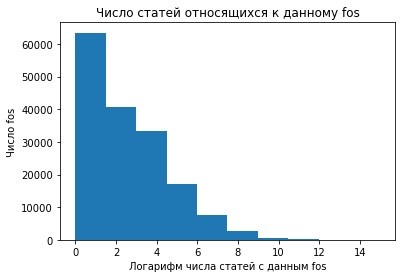

In [17]:
plt.title("Число статей относящихся к данному fos")
plt.xlabel("Логарифм числа статей с данным fos")
plt.ylabel("Число fos")
plt.hist(fos_popularity.article_id.apply(math.log), bins=10)